In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

RAW_PATH = Path("../data/raw/")
PROCESSED_PATH = Path("../data/processed/")
FIGURE_PATH = Path("../outputs/figures/")

PROCESSED_PATH.mkdir(parents=True, exist_ok=True)
FIGURE_PATH.mkdir(parents=True, exist_ok=True)

In [5]:
def load_cmapss_data(dataset: str):
    """Loads train, test, and RUL files for a given dataset FD00x"""
    train = pd.read_csv(RAW_PATH / f"train_{dataset}.txt", 
                        sep="\s+", header=None)
    test = pd.read_csv(RAW_PATH / f"test_{dataset}.txt", 
                       sep="\s+", header=None)
    rul = pd.read_csv(RAW_PATH / f"RUL_{dataset}.txt", 
                      sep="\s+", header=None)

    return train, test, rul

train_FD001, test_FD001, rul_FD001 = load_cmapss_data("FD001")

print(train_FD001.head())
print("Train shape:", train_FD001.shape)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yamun\AppData\Local\Temp\ipykernel_18872\3644472723.py:4: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+", header=None)
C:\Users\yamun\AppData\Local\Temp\ipykernel_18872\3644472723.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+", header=None)
C:\Users\yamun\AppData\Local\Temp\ipykernel_18872\3644472723.py:8: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+", header=None)


   0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...      16       17       18      19    20   21    22     23     24  \
0  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0  38.90   

        25  
0  23.4190  
1  23.4236  
2  23.3442  
3  23.3739  
4  23.4044  

[5 rows

In [6]:
cols = ["unit_number", "time_in_cycles",
        "operational_setting_1", "operational_setting_2", "operational_setting_3"] \
       + [f"sensor_{i}" for i in range(1, 22)]

train_FD001.columns = cols
test_FD001.columns = cols

In [7]:
rul_per_unit = train_FD001.groupby("unit_number")["time_in_cycles"].max()

train_FD001["RUL"] = train_FD001.apply(
    lambda row: rul_per_unit[row.unit_number] - row.time_in_cycles, axis=1
)

train_FD001.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191.0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190.0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189.0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188.0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187.0


In [8]:
train_FD001.to_csv(PROCESSED_PATH / "train_FD001.csv", index=False)
test_FD001.to_csv(PROCESSED_PATH / "test_FD001.csv", index=False)
rul_FD001.to_csv(PROCESSED_PATH / "rul_FD001.csv", index=False)

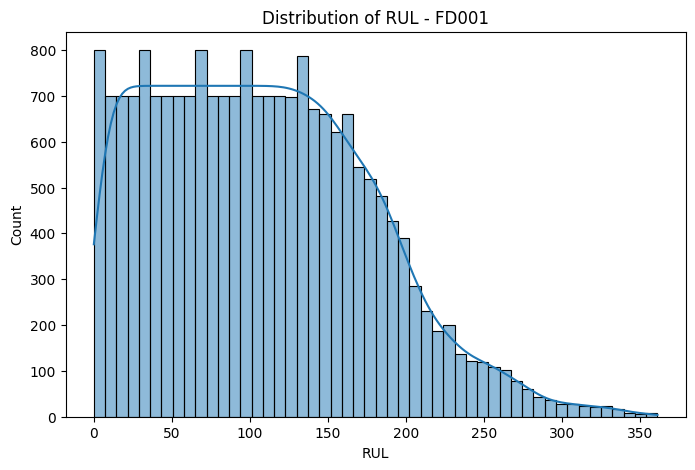

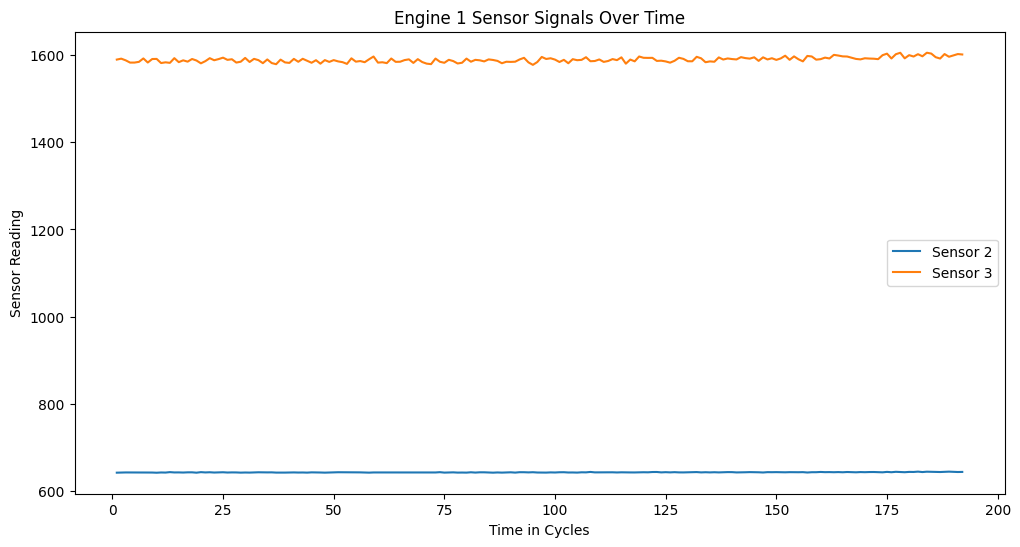

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(train_FD001["RUL"], bins=50, kde=True)
plt.title("Distribution of RUL - FD001")
plt.savefig(FIGURE_PATH / "rul_distribution_FD001.png")
plt.show()

engine1 = train_FD001[train_FD001["unit_number"] == 1]
plt.figure(figsize=(12,6))
plt.plot(engine1["time_in_cycles"], engine1["sensor_2"], label="Sensor 2")
plt.plot(engine1["time_in_cycles"], engine1["sensor_3"], label="Sensor 3")
plt.xlabel("Time in Cycles")
plt.ylabel("Sensor Reading")
plt.legend()
plt.title("Engine 1 Sensor Signals Over Time")
plt.savefig(FIGURE_PATH / "engine1_sensors.png")
plt.show()

In [10]:
def load_cmapss_data(dataset: str):
    """Loads train, test, and RUL files for a given dataset FD00x"""
    train = pd.read_csv(RAW_PATH / f"train_{dataset}.txt", 
                        sep="\s+", header=None)
    test = pd.read_csv(RAW_PATH / f"test_{dataset}.txt", 
                       sep="\s+", header=None)
    rul = pd.read_csv(RAW_PATH / f"RUL_{dataset}.txt", 
                      sep="\s+", header=None)

    return train, test, rul

train_FD002, test_FD002, rul_FD002 = load_cmapss_data("FD002")

print(train_FD002.head())
print("Train shape:", train_FD002.shape)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yamun\AppData\Local\Temp\ipykernel_18872\2926327158.py:4: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+", header=None)
C:\Users\yamun\AppData\Local\Temp\ipykernel_18872\2926327158.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+", header=None)
C:\Users\yamun\AppData\Local\Temp\ipykernel_18872\2926327158.py:8: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+", header=None)


   0   1        2       3      4       5       6        7        8     9   \
0   1   1  34.9983  0.8400  100.0  449.44  555.32  1358.61  1137.23  5.48   
1   1   2  41.9982  0.8408  100.0  445.00  549.90  1353.22  1125.78  3.91   
2   1   3  24.9988  0.6218   60.0  462.54  537.31  1256.76  1047.45  7.05   
3   1   4  42.0077  0.8416  100.0  445.00  549.51  1354.03  1126.38  3.91   
4   1   5  25.0005  0.6203   60.0  462.54  537.07  1257.71  1047.93  7.05   

   ...      16       17       18       19    20   21    22      23     24  \
0  ...  183.06  2387.72  8048.56   9.3461  0.02  334  2223  100.00  14.73   
1  ...  130.42  2387.66  8072.30   9.3774  0.02  330  2212  100.00  10.41   
2  ...  164.22  2028.03  7864.87  10.8941  0.02  309  1915   84.93  14.08   
3  ...  130.72  2387.61  8068.66   9.3528  0.02  329  2212  100.00  10.59   
4  ...  164.31  2028.00  7861.23  10.8963  0.02  309  1915   84.93  14.13   

       25  
0  8.8071  
1  6.2665  
2  8.6723  
3  6.4701  
4  8.5286  

[

In [11]:
cols = ["unit_number", "time_in_cycles",
        "operational_setting_1", "operational_setting_2", "operational_setting_3"] \
       + [f"sensor_{i}" for i in range(1, 22)]

train_FD002.columns = cols
test_FD002.columns = cols

In [13]:
rul_per_unit = train_FD002.groupby("unit_number")["time_in_cycles"].max()

train_FD002["RUL"] = train_FD002.apply(
    lambda row: rul_per_unit[row.unit_number] - row.time_in_cycles, axis=1
)

train_FD002.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,148.0
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,147.0
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,146.0
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,145.0
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,144.0


In [14]:
train_FD002.to_csv(PROCESSED_PATH / "train_FD002.csv", index=False)
test_FD002.to_csv(PROCESSED_PATH / "test_FD002.csv", index=False)
rul_FD002.to_csv(PROCESSED_PATH / "rul_FD002.csv", index=False)

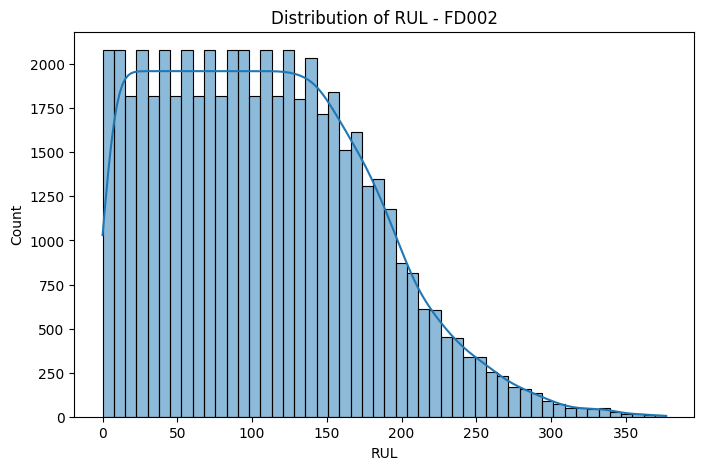

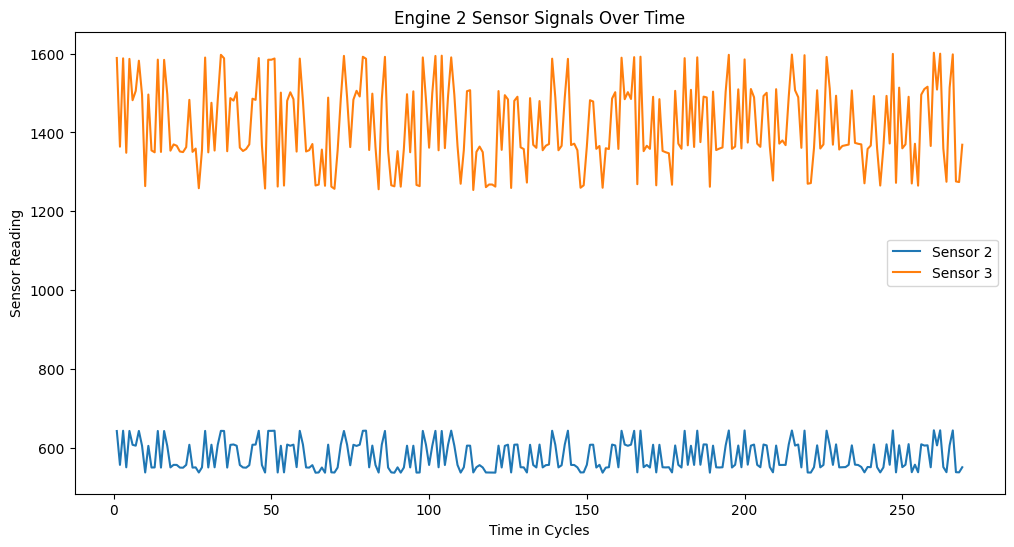

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(train_FD002["RUL"], bins=50, kde=True)
plt.title("Distribution of RUL - FD002")
plt.savefig(FIGURE_PATH / "rul_distribution_FD002.png")
plt.show()

engine2 = train_FD002[train_FD002["unit_number"] == 2]
plt.figure(figsize=(12,6))
plt.plot(engine2["time_in_cycles"], engine2["sensor_2"], label="Sensor 2")
plt.plot(engine2["time_in_cycles"], engine2["sensor_3"], label="Sensor 3")
plt.xlabel("Time in Cycles")
plt.ylabel("Sensor Reading")
plt.legend()
plt.title("Engine 2 Sensor Signals Over Time")
plt.savefig(FIGURE_PATH / "engine2_sensors.png")
plt.show()

In [16]:
def load_cmapss_data(dataset: str):
    """Loads train, test, and RUL files for a given dataset FD00x"""
    train = pd.read_csv(RAW_PATH / f"train_{dataset}.txt", 
                        sep="\s+", header=None)
    test = pd.read_csv(RAW_PATH / f"test_{dataset}.txt", 
                       sep="\s+", header=None)
    rul = pd.read_csv(RAW_PATH / f"RUL_{dataset}.txt", 
                      sep="\s+", header=None)

    return train, test, rul

train_FD003, test_FD003, rul_FD003 = load_cmapss_data("FD003")

print(train_FD003.head())
print("Train shape:", train_FD003.shape)
cols = ["unit_number", "time_in_cycles",
        "operational_setting_1", "operational_setting_2", "operational_setting_3"] \
       + [f"sensor_{i}" for i in range(1, 22)]

train_FD003.columns = cols
test_FD003.columns = cols

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yamun\AppData\Local\Temp\ipykernel_18872\2189712746.py:4: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+", header=None)
C:\Users\yamun\AppData\Local\Temp\ipykernel_18872\2189712746.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+", header=None)
C:\Users\yamun\AppData\Local\Temp\ipykernel_18872\2189712746.py:8: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+", header=None)


   0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0005  0.0004  100.0  518.67  642.36  1583.23  1396.84  14.62   
1   1   2  0.0008 -0.0003  100.0  518.67  642.50  1584.69  1396.89  14.62   
2   1   3 -0.0014 -0.0002  100.0  518.67  642.18  1582.35  1405.61  14.62   
3   1   4 -0.0020  0.0001  100.0  518.67  642.92  1585.61  1392.27  14.62   
4   1   5  0.0016  0.0000  100.0  518.67  641.68  1588.63  1397.65  14.62   

   ...      16       17       18      19    20   21    22     23     24  \
0  ...  522.31  2388.01  8145.32  8.4246  0.03  391  2388  100.0  39.11   
1  ...  522.42  2388.03  8152.85  8.4403  0.03  392  2388  100.0  38.99   
2  ...  522.03  2388.00  8150.17  8.3901  0.03  391  2388  100.0  38.85   
3  ...  522.49  2388.08  8146.56  8.3878  0.03  392  2388  100.0  38.96   
4  ...  522.58  2388.03  8147.80  8.3869  0.03  392  2388  100.0  39.14   

        25  
0  23.3537  
1  23.4491  
2  23.3669  
3  23.2951  
4  23.4583  

[5 rows

In [17]:
rul_per_unit = train_FD003.groupby("unit_number")["time_in_cycles"].max()

train_FD003["RUL"] = train_FD003.apply(
    lambda row: rul_per_unit[row.unit_number] - row.time_in_cycles, axis=1
)

train_FD003.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,258.0
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,257.0
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,256.0
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,255.0
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,254.0


In [18]:
train_FD003.to_csv(PROCESSED_PATH / "train_FD003.csv", index=False)
test_FD003.to_csv(PROCESSED_PATH / "test_FD003.csv", index=False)
rul_FD003.to_csv(PROCESSED_PATH / "rul_FD003.csv", index=False)

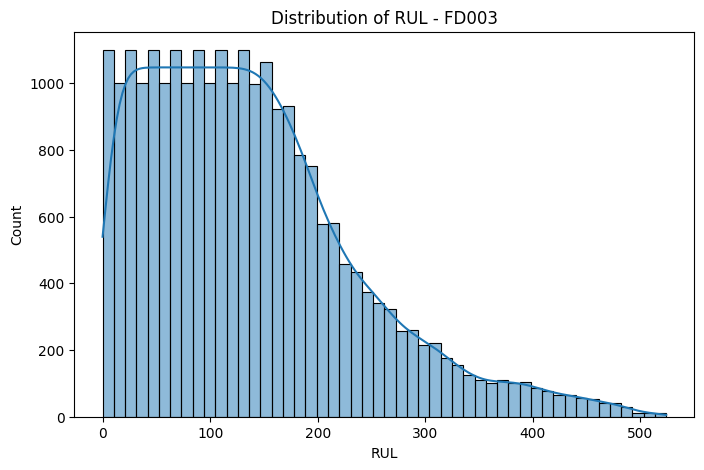

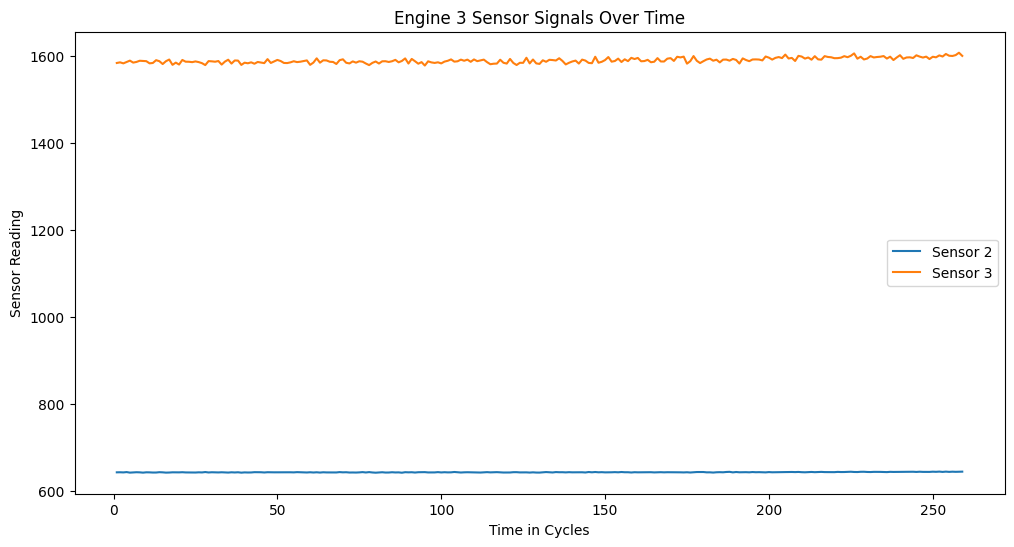

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(train_FD003["RUL"], bins=50, kde=True)
plt.title("Distribution of RUL - FD003")
plt.savefig(FIGURE_PATH / "rul_distribution_FD003.png")
plt.show()

engine3 = train_FD003[train_FD003["unit_number"] == 1]
plt.figure(figsize=(12,6))
plt.plot(engine3["time_in_cycles"], engine3["sensor_2"], label="Sensor 2")
plt.plot(engine3["time_in_cycles"], engine3["sensor_3"], label="Sensor 3")
plt.xlabel("Time in Cycles")
plt.ylabel("Sensor Reading")
plt.legend()
plt.title("Engine 3 Sensor Signals Over Time")
plt.savefig(FIGURE_PATH / "engine3_sensors.png")
plt.show()


In [20]:
def load_cmapss_data(dataset: str):
    """Loads train, test, and RUL files for a given dataset FD00x"""
    train = pd.read_csv(RAW_PATH / f"train_{dataset}.txt", 
                        sep="\s+", header=None)
    test = pd.read_csv(RAW_PATH / f"test_{dataset}.txt", 
                       sep="\s+", header=None)
    rul = pd.read_csv(RAW_PATH / f"RUL_{dataset}.txt", 
                      sep="\s+", header=None)

    return train, test, rul

train_FD004, test_FD004, rul_FD004 = load_cmapss_data("FD004")

print(train_FD004.head())
print("Train shape:", train_FD004.shape)
cols = ["unit_number", "time_in_cycles",
        "operational_setting_1", "operational_setting_2", "operational_setting_3"] \
       + [f"sensor_{i}" for i in range(1, 22)]

train_FD004.columns = cols
test_FD004.columns = cols

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yamun\AppData\Local\Temp\ipykernel_18872\138213725.py:4: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+", header=None)
C:\Users\yamun\AppData\Local\Temp\ipykernel_18872\138213725.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+", header=None)
C:\Users\yamun\AppData\Local\Temp\ipykernel_18872\138213725.py:8: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+", header=None)


   0   1        2       3      4       5       6        7        8     9   \
0   1   1  42.0049  0.8400  100.0  445.00  549.68  1343.43  1112.93  3.91   
1   1   2  20.0020  0.7002  100.0  491.19  606.07  1477.61  1237.50  9.35   
2   1   3  42.0038  0.8409  100.0  445.00  548.95  1343.12  1117.05  3.91   
3   1   4  42.0000  0.8400  100.0  445.00  548.70  1341.24  1118.03  3.91   
4   1   5  25.0063  0.6207   60.0  462.54  536.10  1255.23  1033.59  7.05   

   ...      16       17       18       19    20   21    22      23     24  \
0  ...  129.78  2387.99  8074.83   9.3335  0.02  330  2212  100.00  10.62   
1  ...  312.59  2387.73  8046.13   9.1913  0.02  361  2324  100.00  24.37   
2  ...  129.62  2387.97  8066.62   9.4007  0.02  329  2212  100.00  10.48   
3  ...  129.80  2388.02  8076.05   9.3369  0.02  328  2212  100.00  10.54   
4  ...  164.11  2028.08  7865.80  10.8366  0.02  305  1915   84.93  14.03   

        25  
0   6.3670  
1  14.6552  
2   6.4213  
3   6.4176  
4   8.675

In [21]:
rul_per_unit = train_FD004.groupby("unit_number")["time_in_cycles"].max()

train_FD004["RUL"] = train_FD004.apply(
    lambda row: rul_per_unit[row.unit_number] - row.time_in_cycles, axis=1
)

train_FD004.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,320.0
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,319.0
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,318.0
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,317.0
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,316.0


In [22]:
train_FD004.to_csv(PROCESSED_PATH / "train_FD004.csv", index=False)
test_FD004.to_csv(PROCESSED_PATH / "test_FD004.csv", index=False)
rul_FD004.to_csv(PROCESSED_PATH / "rul_FD004.csv", index=False)

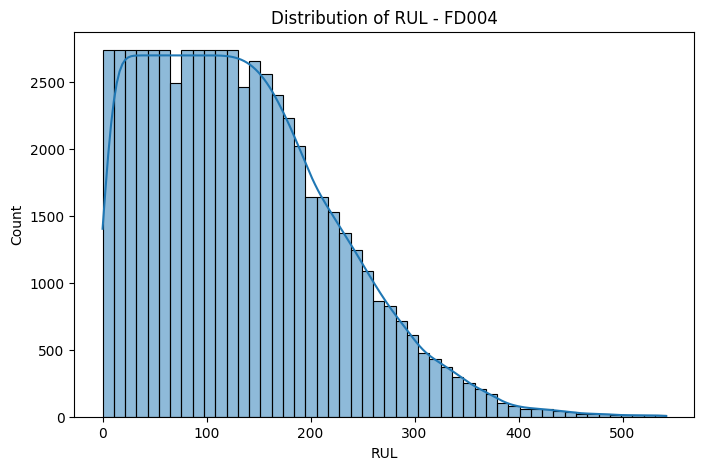

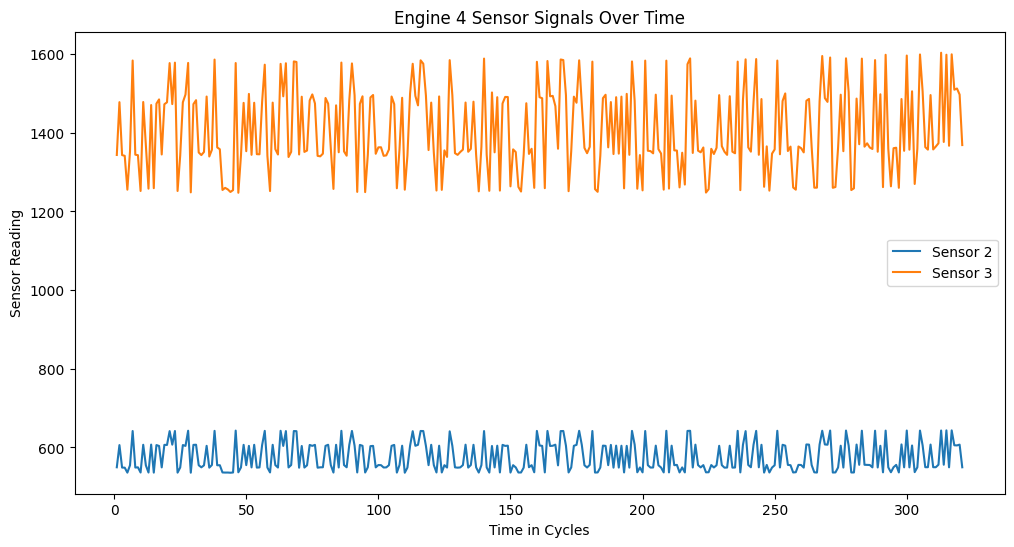

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(train_FD004["RUL"], bins=50, kde=True)
plt.title("Distribution of RUL - FD004")
plt.savefig(FIGURE_PATH / "rul_distribution_FD004.png")
plt.show()

engine4 = train_FD004[train_FD004["unit_number"] == 1]
plt.figure(figsize=(12,6))
plt.plot(engine4["time_in_cycles"], engine4["sensor_2"], label="Sensor 2")
plt.plot(engine4["time_in_cycles"], engine4["sensor_3"], label="Sensor 3")
plt.xlabel("Time in Cycles")
plt.ylabel("Sensor Reading")
plt.legend()
plt.title("Engine 4 Sensor Signals Over Time")
plt.savefig(FIGURE_PATH / "engine4_sensors.png")
plt.show()